In [1]:
import sympy as sym
sym.init_printing()

In [2]:
import imp

macaulay = imp.load_source('macaulay', '../src/macaulay.py')
tools = imp.load_source('tools', '/home/nightwing/rsc/Optimisation-of-Memory-One-strategies/src/tools.py')

In [3]:
p_1, p_2, p_3, p_4 = sym.symbols('p_1, p_2, p_3, p_4')

In [4]:
q_1, q_2, q_3, q_4 = sym.symbols('q_1, q_2, q_3, q_4')

In [5]:
p = (p_1, p_2, p_3, p_4)
q = (q_1, q_2, q_3, q_4)

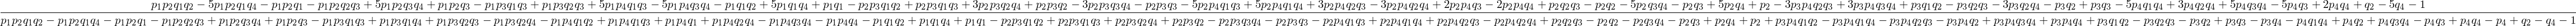

In [8]:
utility = tools.utility(p, q).factor()
utility

In [29]:
f_1 = sym.lambdify(p, sym.fraction(sym.diff(utility, p_1).factor())[0])
f_2 = sym.lambdify(p, sym.fraction(sym.diff(utility, p_2).factor())[0])
f_3 = sym.lambdify(p, sym.fraction(sym.diff(utility, p_3).factor())[0])
f_4 = sym.lambdify(p, sym.fraction(sym.diff(utility, p_4).factor())[0])

In [57]:
mac = macaulay.MacaulayResultant(polynomials=[f_1, f_2, f_3, f_4], variables=[p_4, p_3, p_2, p_1])

In [58]:
mac.degrees

In [59]:
mac.degree_m

In [60]:
mac.get_monomials_set()

In [61]:
mac.monomials_size

In [62]:
matrix = mac.get_matrix()

In [63]:
matrix.shape

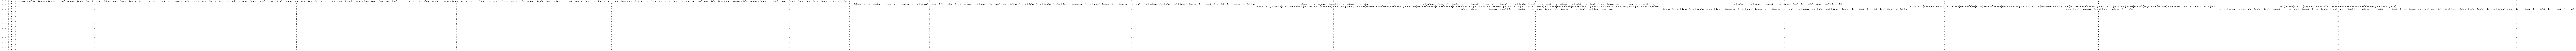

In [64]:
matrix[:20, :20]

In [67]:
submatrix = mac.get_submatrix(matrix)

In [68]:
submatrix

In [71]:
reduction_set = [v ** mac.degrees[i] for i, v in enumerate(mac.variables)]

In [72]:
ais = list([mac.polynomials[i](*mac.variables).coeff(reduction_set[i]) for i in range(mac.n)])
ais

In [52]:
sym.degree(f_1(*p).expand())

In [73]:
f_1(*p).expand().coeff(p_4**2)